In [ ]:
# 2.1 代码流程
# Part2 数据分析
# Step1:库函数导入
# Step2:数据读取/载入
# Step3:数据信息简单查看
# Step4:可视化描述

# Part3 建模预测
# Step2:利用 决策树模型 在三分类(多分类)上 进行训练和预测

In [1]:
# 本次我们选择企鹅数据（palmerpenguins）进行方法的尝试训练，该数据集一共包含8个变量，其中7个特征变量，1个目标分类变量。共有150个样本，目标变量为 企鹅的类别 其都属于企鹅类的三个亚属，分别是(Adélie, Chinstrap and Gentoo)。包含的三种种企鹅的七个特征，分别是所在岛屿，嘴巴长度，嘴巴深度，脚蹼长度，身体体积，性别以及年龄。
##  基础函数库
import numpy as np 
import pandas as pd

## 绘图函数库
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
## 读取并转化为DataFrame格式
data = pd.read_csv(r'/Users/penguins_raw.csv')
data.head()
#查看数据

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007/11/11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007/11/11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007/11/16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007/11/16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007/11/16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [35]:
# 选取特征及分类
data_new = data[['Species','Island','Culmen Length (mm)','Culmen Depth (mm)',
            'Flipper Length (mm)','Body Mass (g)','Sex']]

In [36]:
## 利用.info()查看数据的整体信息
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
Species                344 non-null object
Island                 344 non-null object
Culmen Length (mm)     342 non-null float64
Culmen Depth (mm)      342 non-null float64
Flipper Length (mm)    342 non-null float64
Body Mass (g)          342 non-null float64
Sex                    333 non-null object
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [37]:
#将标签转化为数字
def trans(x):
    if x == data['Species'].unique()[0]:
        return 0
    if x == data['Species'].unique()[1]:
        return 1
    if x == data['Species'].unique()[2]:
        return 2

data_new['Species'] = data_new['Species'].apply(trans)
#哑编码字符型特征
data_new['Island']=pd.get_dummies(data_new['Island'],prefix = 'Island')
data_new['Sex']=pd.get_dummies(data_new['Sex'],prefix = 'Sex')

In [38]:
#对于特征进行一些统计描述
data.describe()

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,344.000000,342.000000,342.000000,342.000000,342.000000,330.000000,331.000000
mean,63.151163,43.921930,17.151170,200.915205,4201.754386,8.733382,-25.686292
std,40.430199,5.459584,1.974793,14.061714,801.954536,0.551770,0.793961
min,1.000000,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
25%,29.000000,39.225000,15.600000,190.000000,3550.000000,8.299890,-26.320305
50%,58.000000,44.450000,17.300000,197.000000,4050.000000,8.652405,-25.833520
75%,95.250000,48.500000,18.700000,213.000000,4750.000000,9.172123,-25.062050
max,152.000000,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.787670


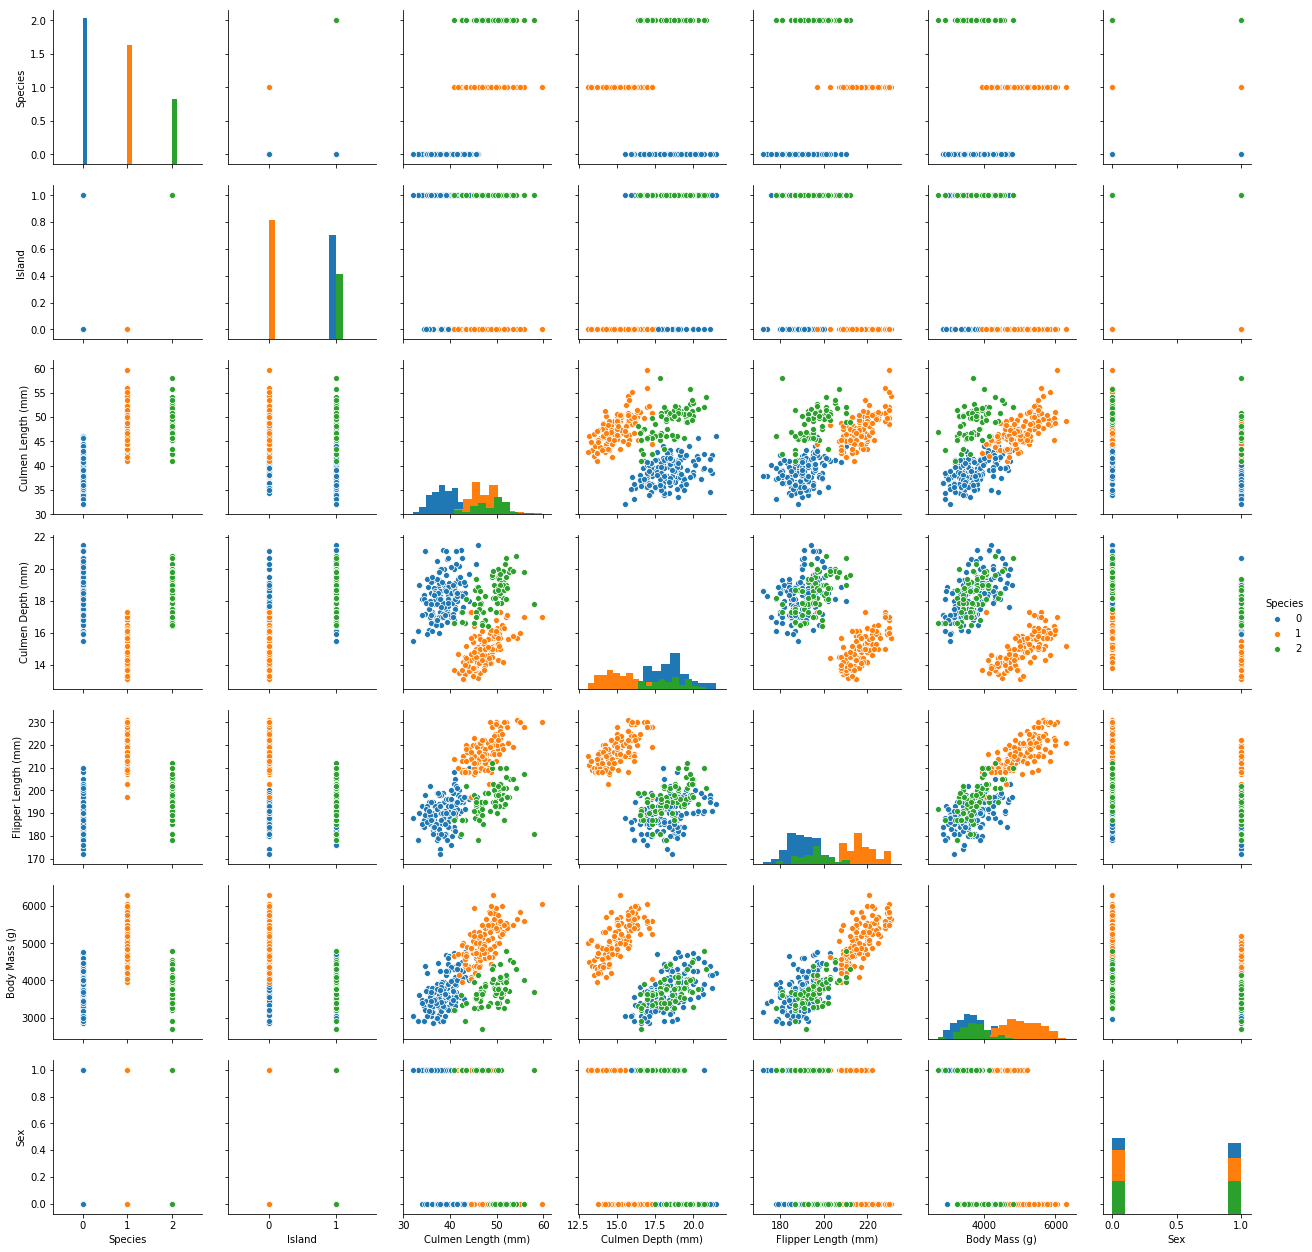

In [48]:
## 特征与标签组合的散点可视化，各类别在数值型特征上有一定的区别
sns.pairplot(data=data_new, diag_kind='hist', hue= 'Species')
plt.show()

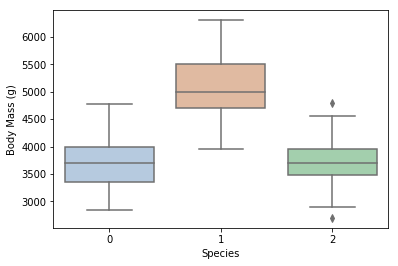

In [50]:
#箱线图观察
sns.boxplot(x='Species', y='Body Mass (g)', saturation=0.5, palette='pastel', data=data_new)
plt.show()

In [58]:
#岛屿分布分组计数查看，1和2类只在一个某一个岛屿生活
data1_group=data_new.groupby([data_new['Species'],data_new['Island']])
Island_count=data1_group.count()
Island_count

Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
Species Island                                                               
0       0                       44                 44                   44   
        1                      108                108                  108   
1       0                      124                124                  124   
2       1                       68                 68                   68   

                Body Mass (g)  Sex  
Species Island                      
0       0                  44   44  
        1                 108  108  
1       0                 124  124  
2       1                  68   68

In [60]:
data_target_part = data_new['Species']
data_features_part=data_new[['Island','Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)','Body Mass (g)','Sex']]

In [91]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_features_part, data_target_part, test_size = 0.2, random_state = 2020)

In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree #导入决策树
from sklearn  import metrics
## 定义 决策树模型 ，https://blog.csdn.net/qq_38923076/article/details/82931340
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [83]:
#可视化
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("penguins")

'penguins.pdf'

In [93]:
# 在训练集和测试集上分布利用训练好的模型进行预测
train_predict = clf.predict(x_train)
test_predict = clf.predict(x_test)

In [94]:
print('The accuracy of the tree is:',metrics.accuracy_score(y_test,test_predict))

The accuracy of the tree is: 0.9565217391304348


In [95]:
## 查看混淆矩阵 (预测值和真实值的各类情况统计矩阵)，有3例错误预测
confusion_matrix_result = metrics.confusion_matrix(test_predict,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)

The confusion matrix result:
 [[30  0  0]
 [ 1 23  0]
 [ 1  1 13]]
